# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [2]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [6]:
list(df.columns)

['YEAR',
 'MAKE',
 'MODEL',
 'VEHICLE CLASS',
 'ENGINE SIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUEL',
 'CITY (L/100 km)',
 'HWY (L/100 km)',
 'COMB (L/100 km)',
 'COMB (mpg)',
 'EMISSIONS']

In [3]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [9]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [ ]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
EMM_AVG = df["EMISSIONS"].mean().round(2)
print(f"산술평균: {EMM_AVG}")
EMM_MED = df["EMISSIONS"].median().round(2)
print(f"중앙값: {EMM_MED}")
EMM_MODE = df["EMISSIONS"].mode()[0].round(2)
print(f"최빈값: {EMM_MODE}")
# TODO 2: 절사평균 계산
EMM_TRIMMEAN = stats.trim_mean(df["EMISSIONS"], proportiontocut=0.1)
print(f"절사평균: {EMM_TRIMMEAN.round(2)}")
# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
weights = np.array([0.5, 0.3, 0.2])
grouped = df[df['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE', 'SUV'])].groupby('VEHICLE CLASS')['EMISSIONS'].mean()
EMM_WEIGHTED_MEAN = np.average(grouped, weights=weights)
print(f"COMPACT, MID-SIZE, SUV 가중평균: {EMM_WEIGHTED_MEAN.round(2)}")
# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
grouped_mean = df[df['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE', 'SUV'])].groupby('VEHICLE CLASS')['EMISSIONS'].mean()
grouped_median = df[df['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE', 'SUV'])].groupby('VEHICLE CLASS')['EMISSIONS'].median()
print("\n차량등급별 평균/중앙값 비교:")
for cls in ['COMPACT', 'MID-SIZE', 'SUV']:
    mean_val = grouped_mean[cls].round(2)
    median_val = grouped_median[cls].round(2)
    print(f"{cls} - 평균: {mean_val}, 중앙값: {median_val}")
# TODO 5: 결과 해석 (print문으로 작성)
print("\n해석:")
print("1. 산술평균은 모든 데이터의 합을 데이터 개수로 나눈 값으로, 전체 데이터의 중심 위치를 나타낸다.")
print("2. 중앙값은 데이터를 정렬한 후 중간에 위치한 값으로, 이상치에 영향을 받지 않는다.")
print("3. 최빈값은 가장 자주 나타나는 값으로, 데이터의 분포 형태를 이해하는 데 도움이 된다.")
print("4. 절사평균은 가장 큰 값과 작은 값을 제거한 후 계산된 평균으로, 이상치의 영향을 줄인다.")
print("5. 가중평균은 각 그룹에 대한 중요도(가중치)를 반영하여 계산된 평균이다.")
print("6. 차량등급별 평균과 중앙값을 비교하여 각 등급의 배출량 특성을 분석할 수 있다.")

산술평균: 250.07
중앙값: 243.0
최빈값: 221
절사평균: 247.34
COMPACT, MID-SIZE, SUV 가중평균: 226.94

차량등급별 평균/중앙값 비교:
COMPACT - 평균: 211.54, 중앙값: 207.0
MID-SIZE - 평균: 223.7, 중앙값: 221.0
SUV - 평균: 270.3, 중앙값: 267.0


---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

EMISSIONS 표준편차: 59.36
ENGINE SIZE 표준편차: 1.34
EMISSIONS 분산: 3523.05
ENGINE SIZE 분산: 1.78
EMISSIONS IQR: 79.00
ENGINE SIZE IQR: 1.90
EMISSIONS 변동계수(CV): 23.74%
ENGINE SIZE 변동계수(CV): 39.78%
EMISSIONS 이상치 (IQR 방법): [423 421 458 442 458 442 522  83 407 426  83 409 409 409 409 409 407 407
 412 428 409 423 421 423 421 412 407 407 428  83 407 444 444 412 412 467
 421 423 442 458 455 428 570 467  83 444 444 421 423 421 423 421 428 455
 428 455  83 444 444 513 469 423 419 423 419 428 453 423 414  83 407 428
 444 444 513 469 423 414  83 430 421 421 416 421 421 416 409 446 490 426
 423 421 416 409 446 490 446 490 426 426 426 426 421 416 446 490 446 490
 423 508 421 416 446 490 446 490  87 490 442  87 490 439  87  85 423  87
  85 435  87  87  87 419 414 432 432 414 416 437 437 418 414 432 432 414
 416 437 437 418 412 453 423 419 426 408 441 465 441 465 420 452 417 476
 450 407 430 438 445 438 445 428 461 438 461 413 467 522 413 454 464 454
 464 419 473 410 465 522 413 487 493 465 522 537 413 485 49

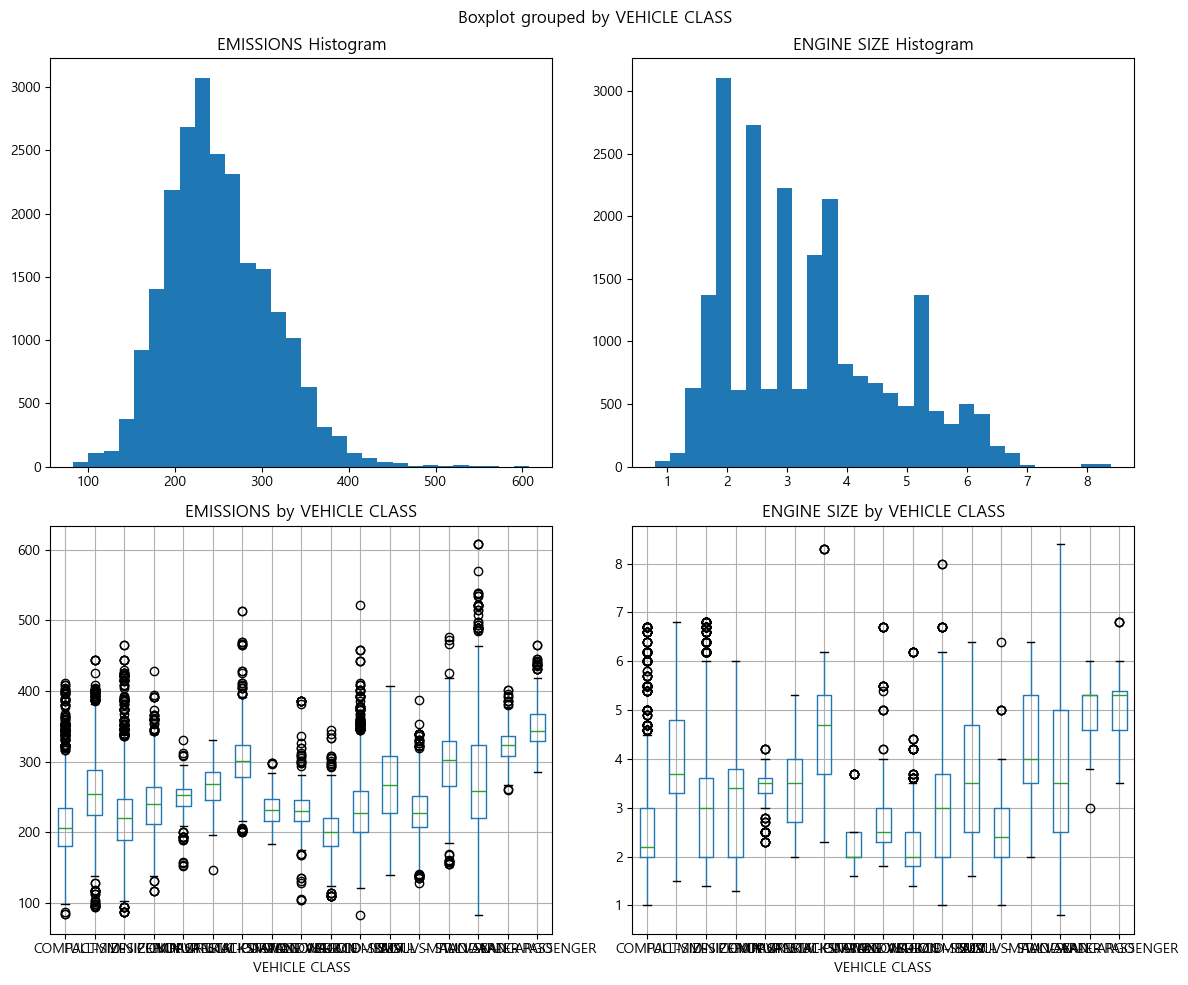

COMPACT - EMISSIONS std: 47.00, ENGINE SIZE std: 1.08
MID-SIZE - EMISSIONS std: 53.79, ENGINE SIZE std: 1.19
SUV - EMISSIONS std: 52.80, ENGINE SIZE std: 1.20


In [27]:
# TODO 1: 두 변수의 산포 측도 계산
emissions = df['EMISSIONS']
engine_size = df['ENGINE SIZE']
emissions_std = emissions.std()
engine_size_std = engine_size.std()
print(f"EMISSIONS 표준편차: {emissions_std:.2f}")
print(f"ENGINE SIZE 표준편차: {engine_size_std:.2f}")
emissions_var = emissions.var()
engine_size_var = engine_size.var()
print(f"EMISSIONS 분산: {emissions_var:.2f}")
print(f"ENGINE SIZE 분산: {engine_size_var:.2f}")
emissions_IQR= stats.iqr(emissions)
engine_size_IQR= stats.iqr(engine_size)
print(f"EMISSIONS IQR: {emissions_IQR:.2f}")
print(f"ENGINE SIZE IQR: {engine_size_IQR:.2f}")

# TODO 2: 변동계수(CV) 계산
emission_cv = (emissions_std / emissions.mean()) * 100
engine_size_cv = (engine_size_std / engine_size.mean()) * 100
print(f"EMISSIONS 변동계수(CV): {emission_cv:.2f}%")
print(f"ENGINE SIZE 변동계수(CV): {engine_size_cv:.2f}%")

# TODO 3: 이상치 탐지 (IQR, Z-score)
emissions_Q1 = emissions.quantile(0.25)
emissions_Q3 = emissions.quantile(0.75)
outlier_lower_bound = emissions_Q1 - 1.5 * emissions_IQR
outlier_upper_bound = emissions_Q3 + 1.5 * emissions_IQR
emissions_outliers_iqr = emissions[(emissions < outlier_lower_bound) | (emissions > outlier_upper_bound)]
print(f"EMISSIONS 이상치 (IQR 방법): {emissions_outliers_iqr.values}")

emissions_z_scores = stats.zscore(emissions)
emissions_outliers_z = emissions[np.abs(emissions_z_scores) > 3]
print(f"EMISSIONS 이상치 (Z-score 방법): {emissions_outliers_z.values}")

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].hist(emissions, bins=30)
axes[0, 0].set_title("EMISSIONS Histogram")
axes[0, 1].hist(engine_size, bins=30)
axes[0, 1].set_title("ENGINE SIZE Histogram")
df.boxplot(column='EMISSIONS', by='VEHICLE CLASS', ax=axes[1, 0])
axes[1, 0].set_title("EMISSIONS by VEHICLE CLASS")
df.boxplot(column='ENGINE SIZE', by='VEHICLE CLASS', ax=axes[1, 1])
axes[1, 1].set_title("ENGINE SIZE by VEHICLE CLASS")
plt.tight_layout()
plt.show()

# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
vehicle_classes = ['COMPACT', 'MID-SIZE', 'SUV']
for vc in vehicle_classes:
    subset = df[df['VEHICLE CLASS'] == vc]
    emissions_std = subset['EMISSIONS'].std()
    engine_size_std = subset['ENGINE SIZE'].std()
    print(f"{vc} - EMISSIONS std: {emissions_std:.2f}, ENGINE SIZE std: {engine_size_std:.2f}")

# TODO 6: 결과 해석

---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

In [ ]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산

# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)

# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교

# TODO 5: 결과 해석

---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [4]:
import math


def my_mean(data):
    return sum(data) / len(data)


def my_trimmed_mean(data, proportion):
    sorted_data = sorted(data)
    n = len(sorted_data)
    trim_count = int(n * proportion)
    trimmed_data = sorted_data[trim_count : n - trim_count]
    return my_mean(trimmed_data)

    ### my_trimmed_mean(data, proportion)


def my_weighted_mean(data, weights):
    s = sum(x * w for x, w in zip(data, weights))
    total_weight = sum(weights)
    return s / total_weight if total_weight else 0

    ### weights = np.array(weights)
    ### weighted_mean = np.average(data, weights=weights)


def my_median(data):
    if len(data)%2 == 0:
        sorted_data = sorted(data)
        n = len(sorted_data)
        mid1 = sorted_data[n//2 - 1]
        mid2 = sorted_data[n//2]
        return (mid1 + mid2) / 2
    else:
        sorted_data = sorted(data)
        n = len(sorted_data)
        return sorted_data[n//2]

def my_mode(data):
    numdic ={}
    for num in data:
        if num in numdic:
            numdic[num] += 1
        else:
            numdic[num] = 1
    return max(numdic, key=numdic.get)


def my_variance(data, ddof=0):
    mean_val = my_mean(data)
    n = len(data)
    if n == 0:
        return 0
    variance = sum((x - mean_val) ** 2 for x in data) / (n - ddof)
    return variance


def my_std(data, ddof=0):
    variance_val= my_variance(data, ddof)
    return math.sqrt(variance_val)
    

def my_percentile(data, q):
    n= len(data)
    sorted_data= sorted(data)
    index= round((n - 1) * (q / 100))
    return sorted_data[index]


def my_iqr(data):
    Q3 = my_percentile(data, 75)
    Q1 = my_percentile(data, 25)
    return Q3 - Q1

In [5]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")


검증 결과

[my_mean]
  ✅ 기본 데이터: 5.0000
  ✅ 홀수 개: 2.8000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.6000

[my_trimmed_mean]
  ✅ 20% 절사: 3.0000
  ✅ 10% 절사: 5.0000
  ✅ 0% 절사: 5.0000

[my_weighted_mean]
  ✅ 학점 계산: 81.2500
  ✅ 동일 가중치: 150.0000
  ✅ 가중치 다름: 23.3333

[my_median]
  ✅ 짝수 개: 5.0000
  ✅ 홀수 개: 3.0000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.0000

[my_mode]
  ✅ 기본 (5가 2번): 5.0000
  ✅ 홀수 (1이 2번): 1.0000
  ✅ 동일 값: 7.0000

[my_variance]
  ✅ 모분산 (ddof=0): 6.0000
  ✅ 표본분산 (ddof=1): 6.6667
  ✅ 동일 값 → 0: 0.0000

[my_std]
  ✅ 모표준편차: 2.4495
  ✅ 표본표준편차: 2.5820
  ✅ 동일 값 → 0: 0.0000

[my_percentile] - Nearest Rank 방식
  ✅ 0% (최솟값): 1.0000
  ✅ 50% (중앙값): 5.0000
  ✅ 100% (최댓값): 9.0000
  ✅ 25%: 3.0000
  ✅ 75%: 7.0000

[my_iqr]
  ✅ 기본 데이터: 4.0000
  ✅ 동일 값 → 0: 0.0000

결과: 30/30 통과 (100%)
🎉 모든 테스트 통과!
